# Introduction to Natural Language Processing (NLP)

Using the Wizard of Oz pickle file from last week, we will clean the text and then we will be perform part of speech tagging using SpaCy. Finally, we will count 2-grams, 3-grams, and 4-grams, plot the Zipfian distribution of the 2-grams, then create a WordCloud of the 2-grams. 

## Load Data and Clean Text

First, we need to load the Wizard of Oz pickle file and then we will clean the text with the function created in the Week 1 Assignment.  

In [1]:
#load dataset
import pickle as pk
chapters = pk.load(open('C:/Users/07hoc/Downloads/MSDS 682 Downloads/Week 2/wizard_of_oz_stories.pk', 'rb'))

To clean our text, we need to convert our 'chapters' from a list to a string so SpaCy can process the text. 

In [2]:
#convert list (chapters) to string (str_chapters)
str_chapters = ' '.join(chapters)

In [3]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [4]:
#load text cleaning function
def clean_text(text):
    nlp_text = nlp(text)
    lemmas = []
    for word in nlp_text:
        if word.is_stop: 
            continue 
        if not word.is_alpha: 
            continue
        if word.lemma_ == '-PRON-':
            lemmas.append(word.lower_) 
        else:
            lemmas.append(word.lemma_)
            
    return ' '.join(lemmas)

With SpaCy and our text cleaning function loaded, we can apply our clean_text function to our Wizard of Oz string. 

In [5]:
#apply clean_text function
clean_chapters = clean_text(str_chapters)

In [6]:
#view clean text
clean_chapters[0:100]

'splendid palace Emerald City center fairy Land Oz great Throne Room Princess Ozma ruler hour day sit'

## Part of Speech Tagging

Part of Speech (POS) tagging is the process of taking a word in the text and linking it to a certain part of speech such as a noun, verb, pronoun, or adjective (WorldClass FTE). To perform part of speech tagging, we can use NLTK or SpaCy. Below, we will use SpaCy to perform part of speech tagging because SpaCy can parse and tag a given document after tokenization (Part-of-speech tags, n.d.). 

In [7]:
#allow nlp to tokenize/process clean text 
doc = nlp(clean_chapters) 
type(doc)

spacy.tokens.doc.Doc

In [8]:
doc[0], type(doc[0]) #find type of first token

(splendid, spacy.tokens.token.Token)

Now, we can loop through all the tokens in our 'doc' variable and perform part of speech tagging (Part-of-speech tags, n.d.). In SpaCy, we can use the .pos_ function which gives us the universal part of speech tags (Universal POS tags). Note, we use the 'break' function below so we can exit the loop before the loop is finished (Forloop - python wiki, n.d.). We can add a counter which allows us to exit the loop after a specific number of iterations. In this case, we will exit the loop when our counter (x) is 10. 

In [9]:
x=0
for token in doc: #loop through tokens in 'doc'
    if x == 10:
        break #use break to loop through x times to reduce output
    print(token, token.pos_) #prints the token and POS tag
    x = x+1 

splendid ADJ
palace NOUN
Emerald PROPN
City PROPN
center NOUN
fairy NOUN
Land NOUN
Oz PROPN
great ADJ
Throne PROPN


To find the most frequent part of speech tags, we can create a list of tokens and tags, append the data using the loop above, and then use pandas to make a dataframe using a dictionary. Using a dictionary allows us to give our dataframe a key column (tokens list) and a value column (part of speech tag list). 

In [10]:
tokens = [] #empty list for tokens
pos = [] #empty list for POS
for token in doc: 
    tokens.append(token) #append token to list
    pos.append(token.pos_) #append token's pos tag to list

In [11]:
#create a dataframe with the two lists above
import pandas as pd
oz_df = pd.DataFrame({'Token': tokens, 'POS': pos}) #use dictionary
oz_df.head(10)

,Token,POS
0,splendid,ADJ
1,palace,NOUN
2,Emerald,PROPN
3,City,PROPN
4,center,NOUN
5,fairy,NOUN
6,Land,NOUN
7,Oz,PROPN
8,great,ADJ
9,Throne,PROPN


The .value_counts() function allows us to return an object that contains the counts of unique values in descending order (Python .Value_count()s, n.d.).

In [12]:
#count how many times each POS appears
oz_df['POS'].value_counts()

NOUN     1812
VERB     1084
PROPN     832
ADJ       686
ADV       236
INTJ       34
ADP        18
SCONJ      15
NUM         9
X           8
AUX         6
PRON        2
DET         2
PUNCT       1
PART        1
Name: POS, dtype: int64

The output above indicates that the most frequent part of speech tags include nouns, verbs, and proper nouns. 

## Count N-Grams

The term N-gram is a concept found in Natural Language Processing. An N-gram is a sequence of word series of a length *n* (Kumar, 2017). To count N-grams, we can use the CountVectorizer found in sklearn.feature_extraction.text (Sklearn. Feature_extraction, n.d.). This module allows us to tokenize a collection of text and convert the tokenized text to a matrix of token counts (Sklearn. Feature_extraction, n.d.). To do this, we need to first import the CountVectorizer. 

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

### Count 1-Grams (Words)

Now, we can create our CountVectorizer so that it counts 1-grams (unigrams/words). After creating the vectorizer, we can use it to tokenize the text and count the word occurrences, which will then be stored in a matrix.

In [14]:
vectorizer = CountVectorizer() #create count vectorizer
counts = vectorizer.fit_transform([clean_chapters]) #fit the vecorizer to our text (must be a list)
counts

<1x1405 sparse matrix of type '<class 'numpy.int64'>'
	with 1405 stored elements in Compressed Sparse Row format>

To view the raw word counts in the matrix, we can use the .todense() function. 

In [15]:
counts.todense() #look at raw word counts// can also use .toarray()

matrix([[2, 2, 1, ..., 2, 1, 1]], dtype=int64)

To get the word that matches the count, we can look at the vocabulary of the 'vectorizer'. The .vocabulary_ command maps the words to their counts, which is then stored in a dictionary where the word is the key and the value is the index (Sklearn. Feature_extraction, n.d.). 

In [16]:
dict_1_gram = vectorizer.vocabulary_ #in dictionary: key = word, index = value

The command 'dict_1_gram' (variable dictionary is stored in) will print the entire dictionary. To limit the output, we can use list slicing and then store the key:value pairs in a dictionary (Get first N key:value pairs in a dictionary, n.d.). The .items() parameter will allow us to return a list with all the dictionary key:value pairs (Get first N key:value pairs in a dictionary, n.d.). For a list, we can get the first few items by using the [x:y] argument. Below, we will limit the output to the first 10 key:value (word:index) pairs. 

In [17]:
out_1_gram = dict(list(dict_1_gram.items())[0: 10]) #limit output
out_1_gram

{'splendid': 1125,
 'palace': 830,
 'emerald': 372,
 'city': 196,
 'center': 178,
 'fairy': 407,
 'land': 659,
 'oz': 825,
 'great': 515,
 'throne': 1239}

Another way to get the words and their index is to use a loop. We can loop through the word and the index in the 'vectorizer.vocabulary_' dictionary items and print them. Below, we use the 'break' function to exit the loop before the loop is finished (Forloop - python wiki, n.d.). We will also add a counter which will allow us to exit the loop after a specific number of iterations. In this case, we will exit the loop when our counter (y) is 10. 

In [18]:
y= 0
for vocab, index in vectorizer.vocabulary_.items():
    if y == 10:
        break
    print(vocab,':', index)
    y = y+1

splendid : 1125
palace : 830
emerald : 372
city : 196
center : 178
fairy : 407
land : 659
oz : 825
great : 515
throne : 1239


To get the actual counts of the word (key), we can use the .flatten() function to "collapse" our matrix into one dimension (NumPy Array manipulation, 2020). Thus, if we wanted to get the counts for the word 'splendid', we would flatten our matrix, then we would use [0, 1125] to indicate that 0 is the first document and 1125 is the index in our word count matrix for 'splendid'.

In [19]:
counts.todense().flatten()[0, 1125] #count for 'splendid'

2

Thus, the word 'splendid' occurs in our cleaned Wizard of Oz text 2 times.

### Count 2-Grams

To get counts for n-grams, where n is greater than 1, we need to use the ngram_range parameter. The ngram_range paramter is a tuple that takes in a lower boundary and upper boundary of the range of n-values for different word n-grams (Sklearn. Feature_extraction, n.d.). For example, an ngram_range of (1, 1) means only unigrams, (1, 2) means unigrams and bigrams, and (2, 2) means only bigrams (Sklearn. Feature_extraction, n.d.).

Thus, following similar steps above, we can find the counts of 2-grams. 

In [20]:
#to get 2-grams
vectorizer_pairs = CountVectorizer(ngram_range=[2,2]) #2-grams
bi_counts = vectorizer_pairs.fit_transform([clean_chapters]) #must be a list
bi_counts.todense()

matrix([[1, 1, 1, ..., 1, 1, 1]], dtype=int64)

In [21]:
dict_2_gram = vectorizer_pairs.vocabulary_
out_2_gram = dict(list(dict_2_gram.items())[0: 10]) #limit output
out_2_gram

{'splendid palace': 3485,
 'palace emerald': 2625,
 'emerald city': 1016,
 'city center': 568,
 'center fairy': 523,
 'fairy land': 1114,
 'land oz': 2018,
 'oz great': 2557,
 'great throne': 1510,
 'throne room': 3783}

In [22]:
bi_counts.todense().flatten()[0, 3485] #counts for 'splendid palace'

2

Thus, the bigram 'splendid palace' occurs 2 times in our text. 

#### WordCloud of 2-Grams

To create a WordCloud of the counts for 2-grams, we will use the generate_from_frequencies method which creates a WordCloud from words and frequencies (Mueller, 2020). First, we need to be able to get the counts from our matrix we created above. The variable 'bi_counts' contains the transformed and fitted vectorizer matrix which has the raw counts for the bigrams. To be able to retrieve the counts from this matrix, we need to use the .todense() function to get the raw counts, and then we use the .flatten() function to collapse the matrix, similar to above. Then, we need to take this matrix and transform it into a numpy array so that is a single dimension array rather than a matrix with multiple dimensions. 

In [23]:
import numpy as np
oz_counts = np.array(bi_counts.todense()).flatten() 
oz_counts #notice single brackets (single dimension)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

Next, we will need to create a dictionary, 'freq_dict', which will contain the counts (frequencies) for each word. To do this, we will need to loop through the 2-grams (keys) and then loop through the indexes (values) in our 'vectorizer_pairs.vocabulary_' dictionary. This dictionary allows us to map the 2-grams to their counts, which can be found in the 'oz_counts' array above. Then, we will set our dictionary, 'freq_dict', to the number of counts for each word pair (2-grams). 

In other words, for every 2-gram and index in our 'vectorizer_pairs.vocabulary_', we will add the 2-gram and the count from the 'oz_counts' array to our 'freq_dict'. 

In [24]:
freq_dict = {} #empty frequency dictionary
for v, i in vectorizer_pairs.vocabulary_.items():
    freq_dict[v] = oz_counts[i] #keys = words (v), counts = index (i)

In [25]:
dict(list(freq_dict.items())[0: 10]) #limited output of counts for 2-grams

{'splendid palace': 2,
 'palace emerald': 2,
 'emerald city': 11,
 'city center': 1,
 'center fairy': 2,
 'fairy land': 2,
 'land oz': 9,
 'oz great': 1,
 'great throne': 2,
 'throne room': 3}

Now, we can create our WordCloud using our 'freq_dict'. 

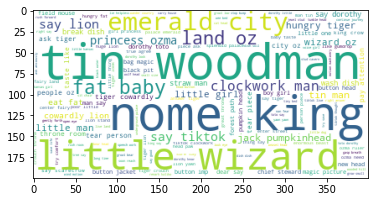

In [27]:
import wordcloud
import matplotlib.pyplot as plt
wc = wordcloud.WordCloud(background_color ="white")
plt.imshow(wc.generate_from_frequencies(freq_dict))
#Sometimes cell needs to be run twice 

To find the top phrases for the 2-grams, we can sort our dictionary by its counts (values). We can sort this dictionary by using a specified key parameter (Dalke & Hettinger, n.d.). This can be done by using the the 'operator' module which contains the function 'itemgetter()', where we can specify the key we want to sort on (Dalke & Hettinger, n.d.). 

In [28]:
from operator import itemgetter
sort_bigram = sorted(freq_dict.items(), key=itemgetter(1), reverse = True) #sort by 'counts' in descending order 
sort_bigram[:20]

[('tin woodman', 18),
 ('nome king', 17),
 ('little wizard', 12),
 ('emerald city', 11),
 ('fat baby', 10),
 ('land oz', 9),
 ('clockwork man', 9),
 ('say lion', 8),
 ('say tiktok', 8),
 ('princess ozma', 7),
 ('jack pumpkinhead', 7),
 ('tin man', 7),
 ('wizard oz', 6),
 ('hungry tiger', 6),
 ('little man', 6),
 ('little girl', 6),
 ('cowardly lion', 5),
 ('eat fat', 5),
 ('say dorothy', 4),
 ('wash dish', 4)]

Thus, we can see the top 20 bigrams in our cleaned Wizard of Oz text. The top few bigrams being 'tin woodman', 'nome king', 'little wizard', and 'emerald city'. 

#### Zipfian Distribution of 2-grams

Zipf's Law "is an empirical law formulated using mathematical statistics that refers to the fact that many types of data studied in the physical and social sciences can be approximated with a Zipfian distribution, one of a family of related discrete power law probability distributions (Zipf's law, 2020)." Zipf's law can be easily observed by plotting data on log-log graph where the x-axis is the log of the the rank order and the y-axis is the log of the frequency (Zipf's law, 2020). 

First, we load the modules needed to create our Zipf plot.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zipf

We need to create the parameters for our plot. We need the following information:

1. The counts for each 2-gram; need to convert to list and then to a numpy array.
2. The 2-grams that correspond to each count; need to convert to list.
3. The ranks which can be generated using a numpy array with a range of 1 to length of number of counts.
4. The order of the words for the ranking.
5. The frequencies, which takes the counts of the sorted indices

Then, to match up the Zipfian distribution from the equation, we need to normalize the frequencies by dividing the frequencies by the sum of the counts (values) becuase we are getting the probability of that word showing up. 

In [30]:
values = np.array(list(freq_dict.values())) # (1)
words = list(freq_dict.keys()) # (2)
ranks = np.arange(1, len(values) + 1) # (3)
indices = np.argsort(-values) # (4)
frequencies = values[indices] #get counts of sorted indices
normalized_frequencies = values[indices]/sum(values) #to match up the Zipfian dist from the equation, need to normalize

Now, we can create our plot. 

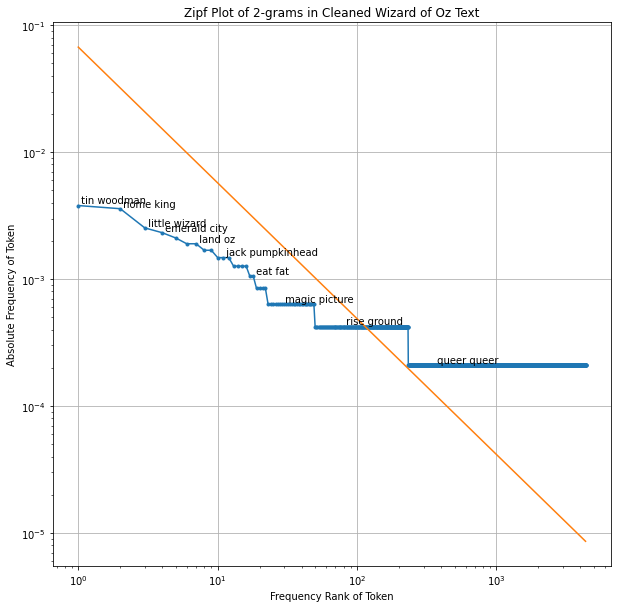

In [31]:
#create plot

plot = plt.figure(figsize=(10,10)) #generate figure for plot and choose size
plt.loglog(ranks, normalized_frequencies, marker = ".") #log-log plot for the ranks and normalized_frequencies

#add the expected Zipfian distribution from the equation

plt.loglog(ranks, [z for z in zipf.pmf(ranks, 1.07)]) #add Zipfian distribution from equation 
    #from Zipfian plot example: shows how to create theoretical Zipfian distributions
    #pmf = probability mass function gets range of values
    
#add labels to plots 

plt.title("Zipf Plot of 2-grams in Cleaned Wizard of Oz Text") #add title
plt.xlabel("Frequency Rank of Token") #label x-axis
plt.ylabel("Absolute Frequency of Token") #label y-axis

plt.grid(True) #add grid lines


last_freq = None
for n in list(np.logspace(-0.5, np.log10(len(values)), 20).astype(int)):
    if last_freq != normalized_frequencies[n]: #check for overlapping words
        dummy = plt.text(ranks[n], normalized_frequencies[n], " " + words[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")
    last_freq = normalized_frequencies[n]


From the output above, the orange line is the theoretical Zipfian distribution which is used for comparison against our actual data. We are getting the probability mass function (pmf) and we give it a range of values which is the 'indices' (ranking). Then we give the pmf a shape parameter, which determines how steep or how flat the line is. This can be any number that is greater than 1, but 1.07 seems to be the best paramter for the shape parameter (Zipf's law, 2020). 

Labels were then added to clearly identify what the axes represented and a grid was added to clean the plot. Then, using code combined from the Video Walkthrough of Zipf Plots and Arup (2013), we can add our text to the plot and we can also check to ensure that we do not have any overlapping words. 

As we can see from our plot, the words that have the highest count (words at the top left of the plot) occur less than the words with lower counts. This plot also indicates that there is less repetition in the writing than we would expect from the natural distribution since most values are below the orange line.  

### Count 3-Grams

We can also count the frequencies of the 3-grams and 4-grams in our text. First, we look at the 3-grams. 

In [32]:
#to get 3-grams
vectorizer_three = CountVectorizer(ngram_range=[3,3]) #2-grams
three_counts = vectorizer_three.fit_transform([clean_chapters]) #must be a list
three_counts.todense()

matrix([[1, 1, 1, ..., 1, 1, 1]], dtype=int64)

Using similar steps that we used creating our WordCloud above, we can count each 3-gram. First, we need to flatten our matrix. 

In [33]:
tri_counts = np.array(three_counts.todense()).flatten() 
tri_counts #notice single brackets (single dimension)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

Now, we can use a loop to get the counts of our 3-grams. 

In [34]:
trigram_counts = {} #empty frequency dictionary
for v, i in vectorizer_three.vocabulary_.items():
    trigram_counts[v] = tri_counts[i]

The 3-grams and the counts of the 3-grams are now in our 'trigram_counts' dictionary. To view the top counts of our 3-grams, we can use an ordered dictionary and the operator module.

In [35]:
sort_trigram = sorted(trigram_counts.items(), key=itemgetter(1), reverse = True) #sort by 'counts' in descending order 
sort_trigram[:20]

[('eat fat baby', 5),
 ('emerald city oz', 3),
 ('little wizard oz', 3),
 ('palace emerald city', 2),
 ('center fairy land', 2),
 ('fairy land oz', 2),
 ('great throne room', 2),
 ('princess ozma ruler', 2),
 ('tiktok clockwork man', 2),
 ('hungry tiger cowardly', 2),
 ('tiger cowardly lion', 2),
 ('hungry fat baby', 2),
 ('tear person piece', 2),
 ('say lion stand', 2),
 ('fat baby taste', 2),
 ('taste like gumdrop', 2),
 ('dorothy little kansas', 2),
 ('little kansas girl', 2),
 ('toto say dorothy', 2),
 ('live land oz', 2)]

### Count 4-Grams

Similar to the steps in counting 3-grams, we can find the top counts for the 4-grams in our text. 

In [36]:
vectorizer_four = CountVectorizer(ngram_range=[4,4]) 
four_counts = vectorizer_four.fit_transform([clean_chapters])
quad_counts = np.array(four_counts.todense()).flatten() 

In [37]:
fourgram_counts = {} #empty frequency dictionary
for v, i in vectorizer_four.vocabulary_.items():
    fourgram_counts[v] = quad_counts[i]

Now, we can sort our dictionary containing the 4-grams and their counts using the operator module and the sorted() function. 

In [38]:
sort_fourgram = sorted(fourgram_counts.items(), key=itemgetter(1), reverse = True) #sort by 'counts' in descending order 
sort_fourgram[:20]

[('center fairy land oz', 2),
 ('hungry tiger cowardly lion', 2),
 ('dorothy little kansas girl', 2),
 ('splendid palace emerald city', 1),
 ('palace emerald city center', 1),
 ('emerald city center fairy', 1),
 ('city center fairy land', 1),
 ('fairy land oz great', 1),
 ('land oz great throne', 1),
 ('oz great throne room', 1),
 ('great throne room princess', 1),
 ('throne room princess ozma', 1),
 ('room princess ozma ruler', 1),
 ('princess ozma ruler hour', 1),
 ('ozma ruler hour day', 1),
 ('ruler hour day sit', 1),
 ('hour day sit throne', 1),
 ('day sit throne glisten', 1),
 ('sit throne glisten emerald', 1),
 ('throne glisten emerald listen', 1)]

Three-grams and 4-grams are not very useful because of the low frequencies of each 3- and 4-gram. 

As demonstrated above, we cleaned our Wizard of Oz text and performed part of speech tagging, where we found that the most tagged parts of speech were nouns and verbs. Then, we counted 1-gram, 2-grams, 3-grams, and 4-grams using the CountVecorizer in sklearn.feature_extraction.text. We then created a wordcloud of the 2-grams and then plotted the Zipfian distribution of the 2-grams. 

Resources

Arup, F. (2013, October 22). Zipf plot for word counts in Brown corpus. https://finnaarupnielsen.wordpress.com/2013/10/22/zipf-plot-for-word-counts-in-brown-corpus/

Dalke, A., & Hettinger, R. (n.d.). Sorting . Retrieved May 16, 2020, from https://docs.python.org/3/howto/sorting.html

Forloop—Python wiki. (n.d.). Retrieved May 24, 2020, from https://wiki.python.org/moin/ForLoop

Get first N key:value pairs in a dictionary. (n.d.). https://www.geeksforgeeks.org/python-get-first-n-keyvalue-pairs-in-given-dictionary/

Kumar, P. (2017, October 21). An introduction to n-grams: What are they and why do we need them? XRDS. https://blog.xrds.acm.org/2017/10/introduction-n-grams-need/

Mueller, A. (2020). Wordcloud documentation. https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

NumPy Array manipulation. (2020, February 26). W3resource. http://www.w3resource.com/numpy/manipulation/ndarray-flatten.php

Part-of-speech tags. (n.d.). https://spacy.io/usage/spacy-101#annotations-pos-deps

Python .Value_count()s. (2018, December 24). GeeksforGeeks. https://www.geeksforgeeks.org/python-pandas-index-value_counts/

Sklearn. Feature_extraction. (n.d.). Retrieved May 24, 2020, from https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

Universal POS tags. (n.d.). Retrieved May 24, 2020, from https://universaldependencies.org/docs/u/pos/

World Class From the Expert: Week 3

Zipf’s law. (2020). In Wikipedia. https://en.wikipedia.org/w/index.php?title=Zipf%27s_law&oldid=955406626